In [624]:
import tensorflow as tf

In [625]:
import numpy as np

In [626]:
from sklearn.preprocessing import MinMaxScaler

In [627]:
from sklearn.datasets import fetch_openml

In [628]:
from sklearn.model_selection import train_test_split

In [629]:
from tensorflow.keras import datasets, layers, models

In [630]:
import matplotlib.pyplot as plt

In [631]:
mnist = fetch_openml('mnist_784', version=1, cache=False)

In [632]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

In [633]:
y_train = y_train.astype(int)

In [634]:
y_test = y_test.astype(int)

In [635]:
batch_size = len(X_train)

X_test.shape

In [636]:
scaler = MinMaxScaler()

In [637]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [638]:
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

In [639]:
X_train_scaled.shape[1:]

(784,)

In [640]:
feature_columns = [tf.feature_column.numeric_column('x', shape = X_train_scaled.shape[1:])]

In [641]:
model = models.Sequential()

In [642]:
model.add(layers.Conv2D(filters=14, kernel_size=(5,5), activation='relu', input_shape=(28, 28, 1), padding="same", name='conv2d_1'))

In [643]:
model.add(layers.MaxPool2D(pool_size=(2,2), strides=2, name='maxPool2d_1'))

In [644]:
model.add(layers.Conv2D(filters=36, kernel_size=(5, 5), activation='relu', padding='same', name='conv2d_2'))

In [646]:
model.add(layers.MaxPool2D(pool_size=(2,2), strides=2, name='maxPool2d_2'))

In [647]:
model.add(layers.Flatten(name='flatten_1'))

In [648]:
model.add(layers.Dense(units=7*7*36, activation='relu', name="dense_1"))

In [649]:
model.add(layers.Dropout(rate=0.3, name='dropout_1'))

In [650]:
model.add(layers.Dense(units=10, name="dense_2"))

In [651]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 14)        364       
_________________________________________________________________
maxPool2d_1 (MaxPooling2D)   (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        12636     
_________________________________________________________________
maxPool2d_2 (MaxPooling2D)   (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1764)              3113460   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1764)            

In [653]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [654]:
X_test_scaled.shape

(14000, 784)

In [655]:
X_train_scaled = X_train_scaled.reshape((-1, 28, 28, 1))

In [656]:
X_test_scaled = X_test_scaled.reshape((-1, 28, 28, 1))

In [658]:
history = model.fit(X_train_scaled, y_train, epochs=1, 
                    validation_data=(X_test_scaled, y_test))

Train on 56000 samples, validate on 14000 samples
56000/56000 [==============================] - 129s 2ms/sample - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0.0360 - val_accuracy: 0.9885


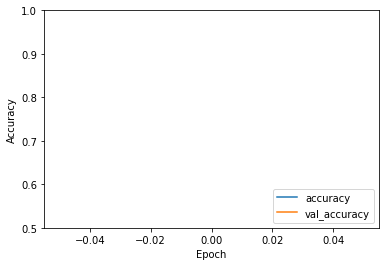

In [659]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [660]:
history.history

{'loss': [0.04093609542639544],
 'accuracy': [0.98735714],
 'val_loss': [0.03598213068066564],
 'val_accuracy': [0.9885]}

In [661]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=2)

14000/1 - 13s - loss: 0.0183 - accuracy: 0.9885


In [662]:
res=model.predict(X_test_scaled)

In [663]:
print(res)

[[ -8.406812    -7.786359    -3.9234257  ...  -7.1337585   15.833873
   -0.75670457]
 [-15.04371     -6.2367854   -8.200247   ...  -1.8776239   -3.1033292
   -1.339227  ]
 [ -4.9213576   -4.934956    -5.2058773  ...  -7.4958405    7.8898935
   -1.551281  ]
 ...
 [ -3.3425293   -2.3245728   12.726057   ...  -3.8739083    0.32146576
   -4.2515407 ]
 [ -6.706266    -2.9931405   -3.365347   ...  11.736816    -5.9430504
    0.8146276 ]
 [ -3.0914333    7.733631    -3.868343   ...  -3.084107    -1.7534245
   -5.0191207 ]]


In [664]:
res.shape

(14000, 10)

In [665]:
# Using estimator models

In [666]:
estimator_model = tf.keras.estimator.model_to_estimator(keras_model=model)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using the Keras model provided.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/6_/8_x7k80s52vcfppnmvb31wxr0000gn/T/tmpekw5uwkm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9741dd7790>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_repli

In [671]:
def get_input_fn(data_df, label_df, num_epochs=None, batch_size=128, shuffle=True, steps=1000):
    def input_fn():
        ds = tf.data.Dataset.from_tensor_slices(({"conv2d_1_input": data_df}, label_df)) if label_df is not None else tf.data.Dataset.from_tensor_slices(({"conv2d_1_input": data_df}))
        if shuffle:
            ds = ds.shuffle(steps)
        ds = ds.batch(batch_size)
        return ds
    return input_fn 

In [672]:
train_input = get_input_fn(X_train_scaled, y_train, batch_size=1000, shuffle=False)

In [673]:
estimator_model.train(input_fn=train_input, steps=None)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Warm-starting with WarmStartSettings: WarmStartSettings(ckpt_to_initialize_from='/var/folders/6_/8_x7k80s52vcfppnmvb31wxr0000gn/T/tmpekw5uwkm/keras/keras_model.ckpt', vars_to_warm_start='.*', var_name_to_vocab_info={}, var_name_to_prev_var_name={})
INFO:tensorflow:Warm-starting from: /var/folders/6_/8_x7k80s52vcfppnmvb31wxr0000gn/T/tmpekw5uwkm/keras/keras_model.ckpt
INFO:tensorflow:Warm-starting variables only in TRAINABLE_VARIABLES.
INFO:tensorflow:Warm-started 8 variables.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/6_/8_x7k80s52vcfppnmvb31wxr0000gn/T/tmpekw5uwkm/model.ckpt.
INFO:tensorflow:loss = 0.019074915, step = 0
INFO:tensorflow:Saving checkpoints for 56 into /var/folders/6_/8_x7k80s52vcfppnmvb31wxr0000gn/T/tmpekw5

In [674]:
eval_input = get_input_fn(X_test_scaled, y_test, batch_size=1000, num_epochs=1, shuffle=False)

In [675]:
estimator_model.evaluate(input_fn=eval_input, steps=None)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-02-06T11:14:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/6_/8_x7k80s52vcfppnmvb31wxr0000gn/T/tmpekw5uwkm/model.ckpt-56
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-02-06-11:14:57
INFO:tensorflow:Saving dict for global step 56: accuracy = 0.99135715, global_step = 56, loss = 0.025457805
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 56: /var/folders/6_/8_x7k80s52vcfppnmvb31wxr0000gn/T/tmpekw5uwkm/model.ckpt-56


{'accuracy': 0.99135715, 'loss': 0.025457805, 'global_step': 56}

In [686]:
a = estimator_model.predict(input_fn=eval_input)